In this notebook:
    - station data and normalized temperature evolution data are merged
    - plot evolution and regression focusing in Madrid

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import time as t
import re
from sklearn import datasets, linear_model
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import matplotlib.patches as mpatches

In [24]:
#import stations with isUrban flag for selected cols
cols = ['Station ID','Station Name', 'Latitude','Longitude','Elevation (m)', 'isUrban' ]
df_stations = pd.read_csv('Dades/OUTPUT XX Filtered Stations Urban-No Urban.csv', skipinitialspace = True, usecols = cols)

In [25]:
#import dades normalitzades
df = pd.read_csv('Dades/OUTPUT 04 Dades Normalitzades.csv')

In [26]:
#merge data with urban information
df_urban = pd.merge(df,df_stations,how='inner',  on ='Station ID')

In [27]:
df_isUrban_byyear = df_urban.pivot_table(index='Year',columns='isUrban',values = 'Temperature Norm Smoothed (moving avg)',aggfunc='mean')

In [28]:
df_station_byyear = df_urban.pivot_table(index='Year',columns=['Station ID'],values = 'Temperature Norm Smoothed (moving avg)',aggfunc='mean')

#Madrid analysis

In [29]:
Madrid_Stations = []
for stations in df_stations['Station ID']:
    if re.search('MADRID.',str(df_stations[df_stations['Station ID' ]== stations]['Station Name'].values)):
        Madrid_Stations.append(stations)
print Madrid_Stations

[22861, 159130, 159132, 159133, 159135, 167177]


In [30]:
#DataFrame with Madrid Stations

not_Madrid_Stations = []
for stations in df_stations['Station ID']:
    if not re.search('MADRID.',str(df_stations[df_stations['Station ID' ]== stations]['Station Name'].values)):
        not_Madrid_Stations.append(stations)

df_Madrid_stations = df_stations
for notmadstations in not_Madrid_Stations:
        df_Madrid_stations  = df_Madrid_stations[df_Madrid_stations['Station ID'] != notmadstations]
        
print df_Madrid_stations

     Station ID                              Station Name  Latitude  \
16        22861  MADRID/CUATROVIENTOS                      40.37780   
80       159130  MADRID/GETAFE                             40.30000   
82       159132  MADRID/CUATRO VIENTOS                     40.38057   
83       159133  MADRID - RETIRO                           40.41136   
84       159135  MADRID/BARAJAS RS                         40.45421   
128      167177  MADRID/TORREJON                           40.48330   

     Longitude  Elevation (m)  isUrban  
16    -3.78920        687.000        1  
80    -3.71952        617.000        1  
82    -3.78590        687.000        1  
83    -3.67808        662.000        1  
84    -3.54125        606.500        1  
128   -3.45025        610.225        1  


In [31]:
#merge data with urban information
df_Madrid = pd.merge(df_Madrid_stations,df,how='inner',  on ='Station ID')

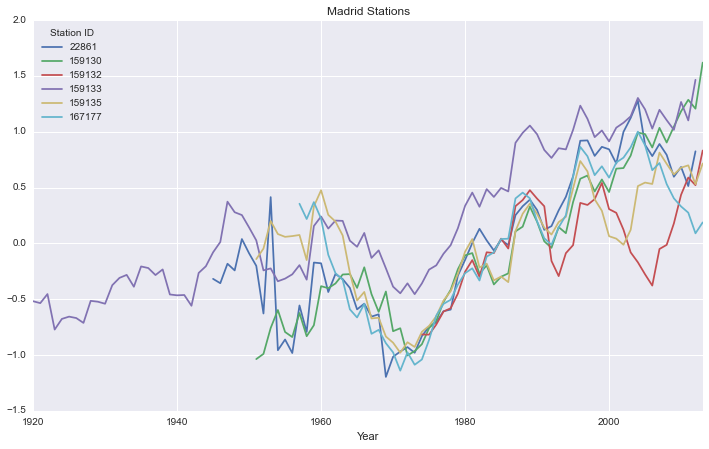

In [32]:
#evolution for each station
df_isUrban_byyearM = df_Madrid.pivot_table(index='Year',columns='Station ID',values = 'Temperature Norm Smoothed (moving avg)',aggfunc='mean')
df_isUrban_byyearM.plot(xlim=(1920,2013),figsize=(12,7), title = 'Madrid Stations')

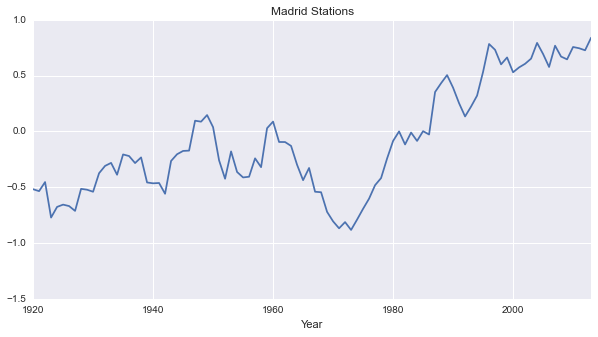

In [33]:
#evolution grouping all stations
df_Madrid_byyear = df_Madrid.pivot_table(index='Year',values = 'Temperature Norm Smoothed (moving avg)',aggfunc='mean')
df_Madrid_byyear.plot(xlim=(1920,2013),figsize=(10,5), title = 'Madrid Stations')

1) Regression Madid vs nonUrban grouping by year and station 

Madrid
Coefficient: 0.013
Residual sum of squares: 0.09
Variance score: 0.67

NON Urban
Coefficient: 0.0057
Residual sum of squares: 0.09
Variance score: 0.29


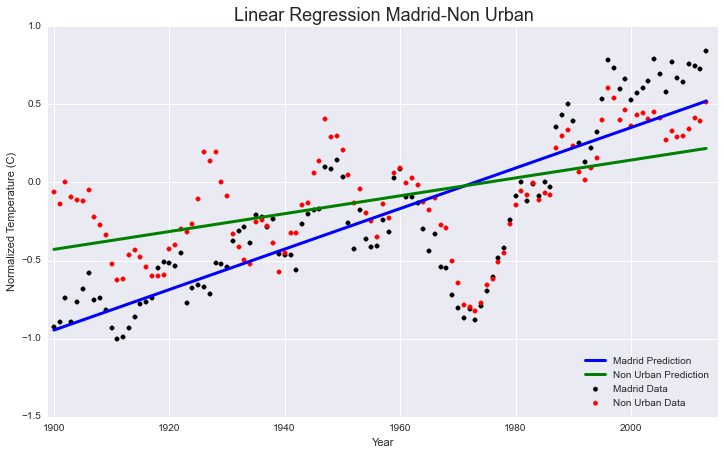

In [34]:
#Madrid regression
regr = linear_model.LinearRegression()
Madrid_X = pd.DataFrame(df_Madrid_byyear.index)
Madrid_Y = pd.DataFrame(df_Madrid_byyear.values)
regr.fit(Madrid_X,Madrid_Y)

#non urban regression
df_isUrban_byyear_stacked = df_isUrban_byyear.stack()
df_nonUrban_byYear = df_isUrban_byyear_stacked[:,0]

regr2 = linear_model.LinearRegression()
Non_Urban_X = pd.DataFrame(df_nonUrban_byYear.index)
Non_Urban_Y = pd.DataFrame(df_nonUrban_byYear.values)
regr2.fit(Non_Urban_X,Non_Urban_Y)



# The coefficients
print "Madrid"
print 'Coefficient:', round(regr.coef_[0][0],4)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(Madrid_X) - Madrid_Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(Madrid_X, Madrid_Y) )

print "\nNON Urban"
print 'Coefficient:', round(regr2.coef_[0][0],4)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr2.predict(Non_Urban_X) - Non_Urban_Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr2.score(Non_Urban_X, Non_Urban_Y))

# Plot outputs
plt.figure(figsize=(12,7))
plt.scatter(Madrid_X, Madrid_Y,  color='black', label='Madrid Data')
plt.plot(Madrid_X, regr.predict(Madrid_X), color='blue',
         linewidth=3, label='Madrid Prediction')

plt.scatter(Non_Urban_X, Non_Urban_Y,  color='red', label = 'Non Urban Data')
plt.plot(Non_Urban_X, regr2.predict(Non_Urban_X), color='green',
         linewidth=3, label = 'Non Urban Prediction')
plt.xlim((1899,2015))
plt.title('Linear Regression Madrid-Non Urban', fontsize=18)
plt.legend(loc=4 , scatterpoints = 1)
plt.xlabel('Year')
plt.ylabel('Normalized Temperature (C)')
plt.show()

2) Regression Madrid vs nonUrban by Date and not grouping nonurban stations

Madrid
Coefficients: 0.013
Residual sum of squares: 0.48
Variance score: 0.28

NON Urban
Coefficients: 0.0084
Residual sum of squares: 0.56
Variance score: 0.07


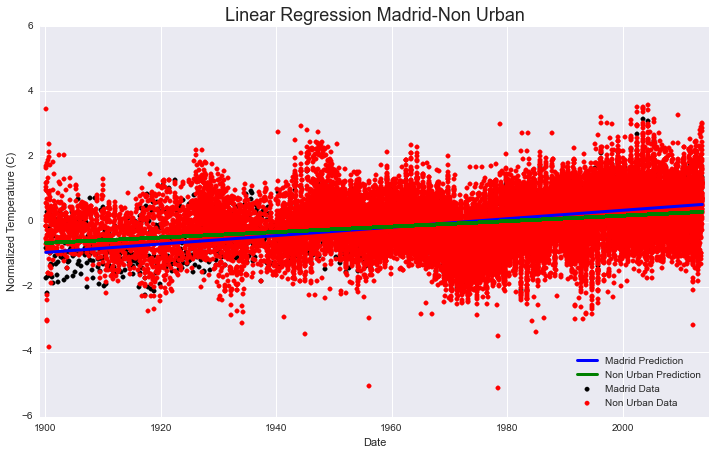

In [35]:
#evolution grouping all stations by Date
df_Madrid_bydate = df_Madrid.pivot_table(index='Date',values = 'Temperature Norm Smoothed (moving avg)',aggfunc='mean')

#Madrid regression
regr = linear_model.LinearRegression()
Madrid_X = pd.DataFrame(df_Madrid_bydate.index)
Madrid_Y = pd.DataFrame(df_Madrid_bydate.values)
regr.fit(Madrid_X,Madrid_Y)

#nonurban regression
df_nonurban = df_urban[df_urban.isUrban==0]
regr2 = linear_model.LinearRegression()
Non_Urban_X = pd.DataFrame(df_nonurban.Date)
Non_Urban_Y = pd.DataFrame(df_nonurban['Temperature Norm Smoothed (moving avg)'])
regr2.fit(Non_Urban_X,Non_Urban_Y)

# The coefficients
print "Madrid"
print 'Coefficients:', round(regr.coef_[0][0],4)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(Madrid_X) - Madrid_Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(Madrid_X, Madrid_Y) )

print "\nNON Urban"
print 'Coefficients:', round(regr2.coef_[0][0],4)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr2.predict(Non_Urban_X) - Non_Urban_Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr2.score(Non_Urban_X, Non_Urban_Y))

# Plot outputs
plt.figure(figsize=(12,7))
plt.scatter(Madrid_X, Madrid_Y,  color='black', label='Madrid Data')
plt.plot(Madrid_X, regr.predict(Madrid_X), color='blue',
         linewidth=3, label='Madrid Prediction')

plt.scatter(Non_Urban_X, Non_Urban_Y,  color='red', label = 'Non Urban Data')
plt.plot(Non_Urban_X, regr2.predict(Non_Urban_X), color='green',
         linewidth=3, label = 'Non Urban Prediction')
plt.xlim((1899,2015))
plt.title('Linear Regression Madrid-Non Urban', fontsize=18)
plt.legend(loc=4 , scatterpoints = 1)
plt.xlabel('Date')
plt.ylabel('Normalized Temperature (C)')
plt.show()

3) Regression Madrid vs nonUrban by Date and not grouping nonurban stations and Year > 1970

In [36]:
df_Madrid70 = df_Madrid[df_Madrid.Year>1969]
df_Madrid_bydate70 = df_Madrid70.pivot_table(index='Date',values = 'Temperature Norm Smoothed (moving avg)',aggfunc='mean')

Madrid
Coefficients: 0.04
Residual sum of squares: 0.47
Variance score: 0.35

NON Urban
Coefficients: 0.0291
Residual sum of squares: 0.52
Variance score: 0.20


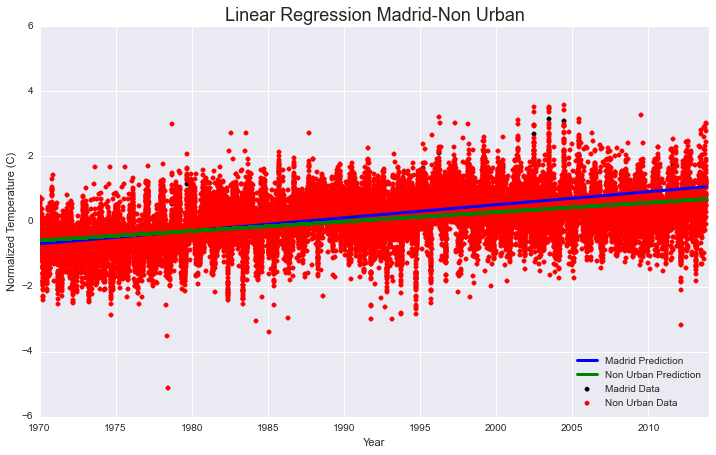

In [37]:
#Madrid regression
regr = linear_model.LinearRegression()
Madrid_X = pd.DataFrame(df_Madrid_bydate70.index)
Madrid_Y = pd.DataFrame(df_Madrid_bydate70.values)
regr.fit(Madrid_X,Madrid_Y)

#nonurban regression
df_nonurban = df_urban[df_urban.isUrban==0]
df_nonurban70 = df_nonurban[df_nonurban.Year>1969]
regr2 = linear_model.LinearRegression()
Non_Urban_X = pd.DataFrame(df_nonurban70.Date)
Non_Urban_Y = pd.DataFrame(df_nonurban70['Temperature Norm Smoothed (moving avg)'])
regr2.fit(Non_Urban_X,Non_Urban_Y)

# The coefficients
print "Madrid"
print 'Coefficients:', round(regr.coef_[0][0],4)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(Madrid_X) - Madrid_Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(Madrid_X, Madrid_Y) )

print "\nNON Urban"
print 'Coefficients:', round(regr2.coef_[0][0],4)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr2.predict(Non_Urban_X) - Non_Urban_Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr2.score(Non_Urban_X, Non_Urban_Y))

# Plot outputs
plt.figure(figsize=(12,7))
plt.scatter(Madrid_X, Madrid_Y,  color='black', label='Madrid Data')
plt.plot(Madrid_X, regr.predict(Madrid_X), color='blue',
         linewidth=3, label='Madrid Prediction')

plt.scatter(Non_Urban_X, Non_Urban_Y,  color='red', label = 'Non Urban Data')
plt.plot(Non_Urban_X, regr2.predict(Non_Urban_X), color='green',
         linewidth=3, label = 'Non Urban Prediction')
plt.xlim((1970,2014))
plt.title('Linear Regression Madrid-Non Urban', fontsize=18)
plt.legend(loc=4 , scatterpoints = 1)
plt.xlabel('Year')
plt.ylabel('Normalized Temperature (C)')
plt.show()

Plot with seaborn

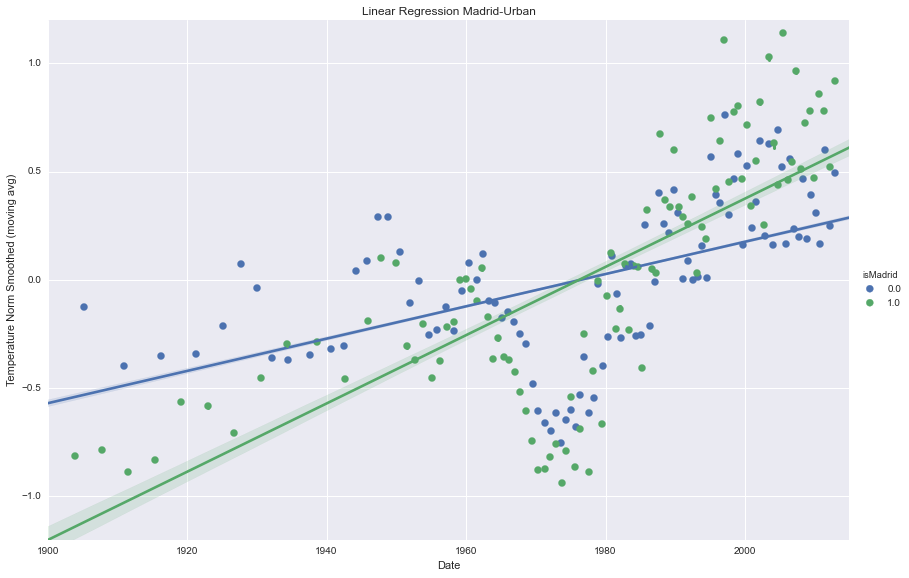

In [38]:
df_Madrid_stations = df_Madrid_stations.set_index(df_Madrid_stations['Station ID'])
df_urban['isMadrid'] = df_urban['Station ID'].map(df_Madrid_stations.isUrban)
df_urban.isMadrid = df_urban.isMadrid.fillna(0)

#x_bins t'agrupa les x del plot perquè quedi més visual / x_ci ajusta l'ombra de la regressió amb l'interval de confiança que dones
lm = sns.lmplot(x="Date", y="Temperature Norm Smoothed (moving avg)", hue="isMadrid", data=df_urban, size = 8, x_bins = 100, x_ci = 0.95,aspect=1.5).set(xlim=(1900,2015),ylim=(-1.2,1.2),title='Linear Regression Madrid-Urban')

A regression with isMadrid and its interaction with Date is done in order to check the significancy of the difference seen before. The interaction shows that the difference is significant. A new analysis should be done for only the years with more samples.

In [39]:
df_Madrid_stations = df_Madrid_stations.set_index(df_Madrid_stations['Station ID'])
df_urban['isMadrid'] = df_urban['Station ID'].map(df_Madrid_stations.isUrban)
df_urban.isMadrid = df_urban.isMadrid.fillna(0)

X_stats = df_urban['Temperature Norm Smoothed (moving avg)']
Y_stats = df_urban[['Date','isMadrid']]
Y_stats ['Date*isMadrid'] = df_urban['Date']*df_urban['isMadrid']
Y_stats = sm.tools.tools.add_constant(Y_stats,prepend=False)

mod = sm.regression.linear_model.OLS(X_stats, Y_stats)
res = mod.fit()
print res.summary()

                                      OLS Regression Results                                      
Dep. Variable:     Temperature Norm Smoothed (moving avg)   R-squared:                       0.075
Model:                                                OLS   Adj. R-squared:                  0.075
Method:                                     Least Squares   F-statistic:                     2397.
Date:                                    Tue, 01 Mar 2016   Prob (F-statistic):               0.00
Time:                                            08:45:08   Log-Likelihood:                -99281.
No. Observations:                                   88370   AIC:                         1.986e+05
Df Residuals:                                       88366   BIC:                         1.986e+05
Df Model:                                               3                                         
Covariance Type:                                nonrobust                                         
          

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Repeating for year > 1970, to analyze the second part of the graph that shows a different trend after the valley:

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


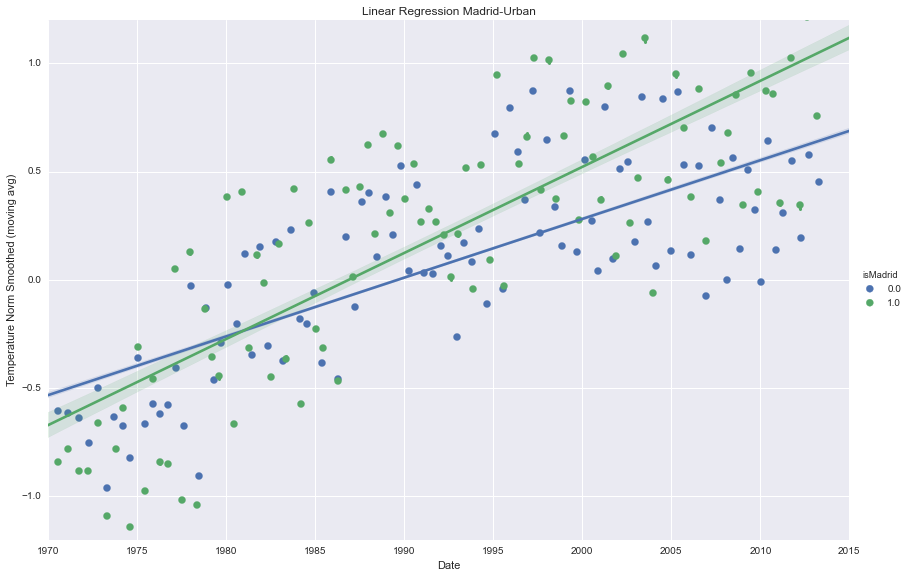

In [40]:
df_Madrid_stations = df_Madrid_stations.set_index(df_Madrid_stations['Station ID'])

df_urban70 = df_urban[df_urban.Year>1969]
df_urban70['isMadrid'] = df_urban70['Station ID'].map(df_Madrid_stations.isUrban)
df_urban70.isMadrid = df_urban70.isMadrid.fillna(0)

#x_bins t'agrupa les x del plot perquè quedi més visual / x_ci ajusta l'ombra de la regressió amb l'interval de confiança que dones
lm = sns.lmplot(x="Date", y="Temperature Norm Smoothed (moving avg)", hue="isMadrid", data=df_urban70, x_bins = 100, size = 8,  x_ci = 0.95,aspect=1.5).set(xlim=(1970,2015),ylim=(-1.2,1.2),title='Linear Regression Madrid-Urban')

A regression with isMadrid and its interaction with Date is done in order to check the significancy of the difference seen before. The interaction shows that the difference is significant, so Madrid temperature is increasing more than in other stations since 1970

In [41]:
df_Madrid_stations = df_Madrid_stations.set_index(df_Madrid_stations['Station ID'])

df_urban70 = df_urban[df_urban.Year>1969]
df_urban70['isMadrid'] = df_urban70['Station ID'].map(df_Madrid_stations.isUrban)
df_urban70.isMadrid = df_urban70.isMadrid.fillna(0)

X_stats = df_urban70['Temperature Norm Smoothed (moving avg)']
Y_stats = df_urban70[['Date','isMadrid']]
Y_stats ['Date*isMadrid'] = df_urban70['Date']*df_urban70['isMadrid']
Y_stats = sm.tools.tools.add_constant(Y_stats,prepend=False)

mod = sm.regression.linear_model.OLS(X_stats, Y_stats)
res = mod.fit()
print res.summary()

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                                      OLS Regression Results                                      
Dep. Variable:     Temperature Norm Smoothed (moving avg)   R-squared:                       0.189
Model:                                                OLS   Adj. R-squared:                  0.189
Method:                                     Least Squares   F-statistic:                     4456.
Date:                                    Tue, 01 Mar 2016   Prob (F-statistic):               0.00
Time:                                            08:45:21   Log-Likelihood:                -62413.
No. Observations:                                   57255   AIC:                         1.248e+05
Df Residuals:                                       57251   BIC:                         1.249e+05
Df Model:                                               3                                         
Covariance Type:                                nonrobust                                         
          

Madrid Temperature has increased 1.6ºC/100 years in the longer window and 4.0ºC in last 40 years trend

In [42]:
X_stats = df_Madrid['Temperature Norm Smoothed (moving avg)']
Y_stats = df_Madrid['Date']
Y_stats = sm.tools.tools.add_constant(Y_stats,prepend=False)

mod = sm.regression.linear_model.OLS(X_stats, Y_stats)
res = mod.fit()
print res.summary()

                                      OLS Regression Results                                      
Dep. Variable:     Temperature Norm Smoothed (moving avg)   R-squared:                       0.214
Model:                                                OLS   Adj. R-squared:                  0.214
Method:                                     Least Squares   F-statistic:                     1257.
Date:                                    Tue, 01 Mar 2016   Prob (F-statistic):          8.16e-244
Time:                                            08:45:21   Log-Likelihood:                -5485.3
No. Observations:                                    4622   AIC:                         1.097e+04
Df Residuals:                                        4620   BIC:                         1.099e+04
Df Model:                                               1                                         
Covariance Type:                                nonrobust                                         
          

In [43]:
df_Madrid70 = df_Madrid[df_Madrid.Year>1969]

X_stats = df_Madrid70['Temperature Norm Smoothed (moving avg)']
Y_stats = df_Madrid70['Date']
Y_stats = sm.tools.tools.add_constant(Y_stats,prepend=False)

mod = sm.regression.linear_model.OLS(X_stats, Y_stats)
res = mod.fit()
print res.summary()

                                      OLS Regression Results                                      
Dep. Variable:     Temperature Norm Smoothed (moving avg)   R-squared:                       0.285
Model:                                                OLS   Adj. R-squared:                  0.284
Method:                                     Least Squares   F-statistic:                     1190.
Date:                                    Tue, 01 Mar 2016   Prob (F-statistic):          8.11e-220
Time:                                            08:45:21   Log-Likelihood:                -3486.6
No. Observations:                                    2994   AIC:                             6977.
Df Residuals:                                        2992   BIC:                             6989.
Df Model:                                               1                                         
Covariance Type:                                nonrobust                                         
          